<a href="https://colab.research.google.com/github/namoshi/ml_intro/blob/master/poly_sin_cv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 汎化性（交差確認法によるモデル選択）

サイン関数の多項式回帰

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def y(x, W, M):
    Y = np.array([W[i] * (x ** i) for i in range(M+1)])
    return Y.sum()

#(1.2),(1.122),(1.123)
def E(x, t, M):
    A =np.zeros((M+1, M+1))
    for i in range(M+1):
        for j in range(M+1):
            A[i,j] = (x**(i+j)).sum()

    T = np.array([((x**i)*t).sum() for i in range(M+1)])
    return  np.linalg.solve(A, T)

データの生成（20サンプル）

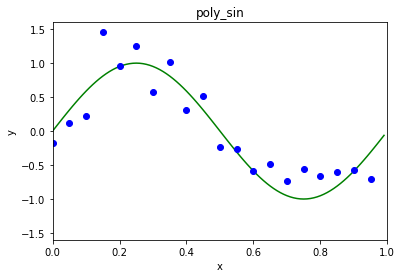

In [3]:
#Sine curve
x_real = np.arange(0, 1, 0.01)
y_real = np.sin(2*np.pi*x_real)

##Training Data
N=20
x_train = np.arange(0, 1, 1.0/N)

#Set "small level of random noise having a Gaussian distribution"
loc = 0
scale = 0.3
y_train =  np.sin(2*np.pi*x_train) + np.random.normal(loc,scale,N)

plt.plot(x_real, y_real, 'g-')
plt.plot(x_train, y_train, 'bo') 
plt.xlim(0.0, 1.0)
plt.ylim(-1.6, 1.6)
plt.title("poly_sin")
plt.xlabel('x')
plt.ylabel('y')
plt.savefig('poly_sin_cv20.eps')
plt.show()
plt.close()

多項式回帰の当てはめ（モデル選択）

[ 0  3  4  5  6  8  9 10 11 12 14 15 16 17 18 19] [ 1  2  7 13]
[0.   0.15 0.2  0.25 0.3  0.4  0.45 0.5  0.55 0.6  0.7  0.75 0.8  0.85
 0.9  0.95]
[-0.1681761   1.45304914  0.95681402  1.24953283  0.57666081  0.30546509
  0.51314528 -0.22903337 -0.26906915 -0.58229698 -0.73534089 -0.55410646
 -0.66729671 -0.60117484 -0.57758206 -0.69858058]
W
 [-0.00174937]


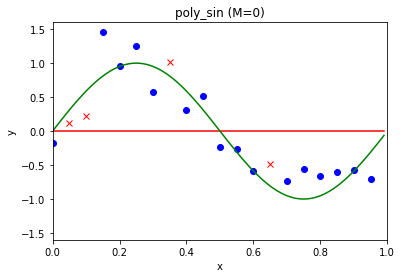

MSE= 0.33348536516930316
[ 0  1  2  3  4  5  6  7  9 10 11 12 13 14 16 18] [ 8 15 17 19]
[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.45 0.5  0.55 0.6  0.65 0.7
 0.8  0.9 ]
[-0.1681761   0.11597144  0.22407873  1.45304914  0.95681402  1.24953283
  0.57666081  1.01498896  0.51314528 -0.22903337 -0.26906915 -0.58229698
 -0.48685565 -0.73534089 -0.66729671 -0.57758206]
W
 [0.14928689]


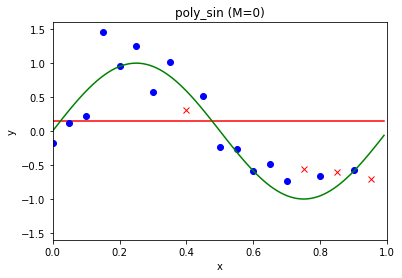

MSE= 0.45030647775387356
[ 0  1  2  3  4  6  7  8  9 10 11 13 15 17 18 19] [ 5 12 14 16]
[0.   0.05 0.1  0.15 0.2  0.3  0.35 0.4  0.45 0.5  0.55 0.65 0.75 0.85
 0.9  0.95]
[-0.1681761   0.11597144  0.22407873  1.45304914  0.95681402  0.57666081
  1.01498896  0.30546509  0.51314528 -0.22903337 -0.26906915 -0.48685565
 -0.55410646 -0.60117484 -0.57758206 -0.69858058]
W
 [0.0984747]


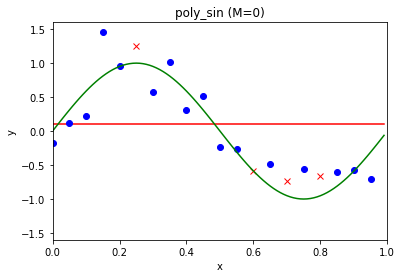

MSE= 0.7675097954535613
[ 1  2  5  6  7  8 10 11 12 13 14 15 16 17 18 19] [0 3 4 9]
[0.05 0.1  0.25 0.3  0.35 0.4  0.5  0.55 0.6  0.65 0.7  0.75 0.8  0.85
 0.9  0.95]
[ 0.11597144  0.22407873  1.24953283  0.57666081  1.01498896  0.30546509
 -0.22903337 -0.26906915 -0.58229698 -0.48685565 -0.73534089 -0.55410646
 -0.66729671 -0.60117484 -0.57758206 -0.69858058]
W
 [-0.11966493]


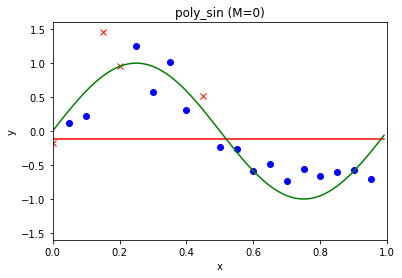

MSE= 1.0087596361808664
[ 0  1  2  3  4  5  7  8  9 12 13 14 15 16 17 19] [ 6 10 11 18]
[0.   0.05 0.1  0.15 0.2  0.25 0.35 0.4  0.45 0.6  0.65 0.7  0.75 0.8
 0.85 0.95]
[-0.1681761   0.11597144  0.22407873  1.45304914  0.95681402  1.24953283
  1.01498896  0.30546509  0.51314528 -0.58229698 -0.48685565 -0.73534089
 -0.55410646 -0.66729671 -0.60117484 -0.69858058]
W
 [0.08370108]


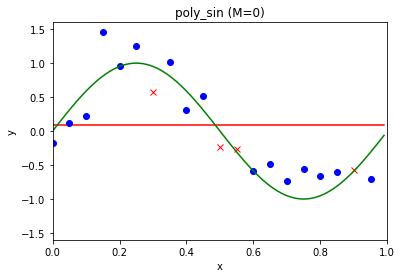

MSE= 0.22563858993790287
CV_MSE[0]=0.557140
[ 0  1  2  3  4  5  6  8  9 10 12 13 16 17 18 19] [ 7 11 14 15]
[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.4  0.45 0.5  0.6  0.65 0.8  0.85
 0.9  0.95]
[-0.1681761   0.11597144  0.22407873  1.45304914  0.95681402  1.24953283
  0.57666081  0.30546509  0.51314528 -0.22903337 -0.58229698 -0.48685565
 -0.66729671 -0.60117484 -0.57758206 -0.69858058]
W
 [ 0.78579296 -1.56489039]


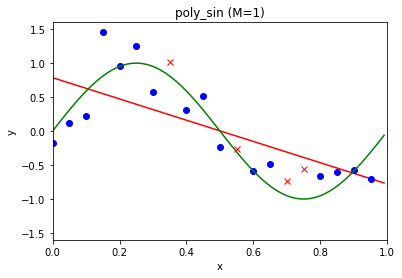

MSE= 0.21253771176789749
[ 0  2  3  4  5  6  7  9 10 11 12 14 15 16 17 18] [ 1  8 13 19]
[0.   0.1  0.15 0.2  0.25 0.3  0.35 0.45 0.5  0.55 0.6  0.7  0.75 0.8
 0.85 0.9 ]
[-0.1681761   0.22407873  1.45304914  0.95681402  1.24953283  0.57666081
  1.01498896  0.51314528 -0.22903337 -0.26906915 -0.58229698 -0.73534089
 -0.55410646 -0.66729671 -0.60117484 -0.57758206]
W
 [ 0.99840506 -1.92889768]


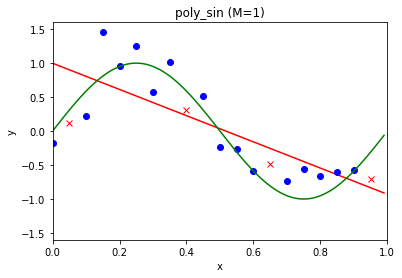

MSE= 0.1739730764731204
[ 0  1  2  3  4  6  7  8  9 10 11 12 13 14 15 19] [ 5 16 17 18]
[0.   0.05 0.1  0.15 0.2  0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65 0.7
 0.75 0.95]
[-0.1681761   0.11597144  0.22407873  1.45304914  0.95681402  0.57666081
  1.01498896  0.30546509  0.51314528 -0.22903337 -0.26906915 -0.58229698
 -0.48685565 -0.73534089 -0.55410646 -0.69858058]
W
 [ 0.75612562 -1.59123816]


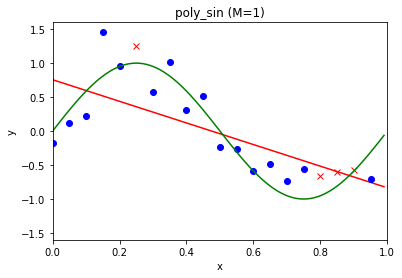

MSE= 0.20665085726630156
[ 0  1  2  4  5  7  8  9 11 13 14 15 16 17 18 19] [ 3  6 10 12]
[0.   0.05 0.1  0.2  0.25 0.35 0.4  0.45 0.55 0.65 0.7  0.75 0.8  0.85
 0.9  0.95]
[-0.1681761   0.11597144  0.22407873  0.95681402  1.24953283  1.01498896
  0.30546509  0.51314528 -0.26906915 -0.48685565 -0.73534089 -0.55410646
 -0.66729671 -0.60117484 -0.57758206 -0.69858058]
W
 [ 0.70227744 -1.46095914]


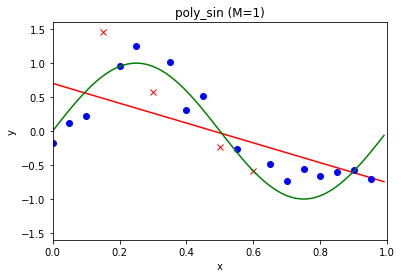

MSE= 0.3113239352900911
[ 1  3  5  6  7  8 10 11 12 13 14 15 16 17 18 19] [0 2 4 9]
[0.05 0.15 0.25 0.3  0.35 0.4  0.5  0.55 0.6  0.65 0.7  0.75 0.8  0.85
 0.9  0.95]
[ 0.11597144  1.45304914  1.24953283  0.57666081  1.01498896  0.30546509
 -0.22903337 -0.26906915 -0.58229698 -0.48685565 -0.73534089 -0.55410646
 -0.66729671 -0.60117484 -0.57758206 -0.69858058]
W
 [ 1.17145889 -2.22045837]


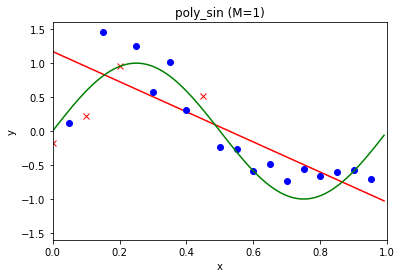

MSE= 0.6223963604669083
CV_MSE[1]=0.305376
[ 0  1  2  3  4  5  8  9 11 12 13 14 15 16 17 18] [ 6  7 10 19]
[0.   0.05 0.1  0.15 0.2  0.25 0.4  0.45 0.55 0.6  0.65 0.7  0.75 0.8
 0.85 0.9 ]
[-0.1681761   0.11597144  0.22407873  1.45304914  0.95681402  1.24953283
  0.30546509  0.51314528 -0.26906915 -0.58229698 -0.48685565 -0.73534089
 -0.55410646 -0.66729671 -0.60117484 -0.57758206]
W
 [ 0.44103039  1.01233975 -2.98786751]


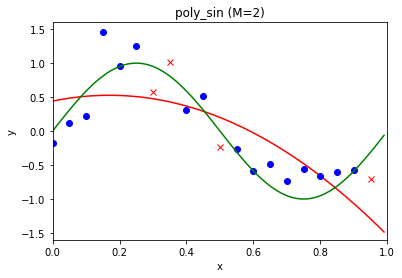

MSE= 0.2229277035169676
[ 0  1  2  3  4  5  6  7  8 10 11 12 14 16 17 19] [ 9 13 15 18]
[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.5  0.55 0.6  0.7  0.8
 0.85 0.95]
[-0.1681761   0.11597144  0.22407873  1.45304914  0.95681402  1.24953283
  0.57666081  1.01498896  0.30546509 -0.22903337 -0.26906915 -0.58229698
 -0.73534089 -0.66729671 -0.60117484 -0.69858058]
W
 [ 0.48969616  0.77884837 -2.66828788]


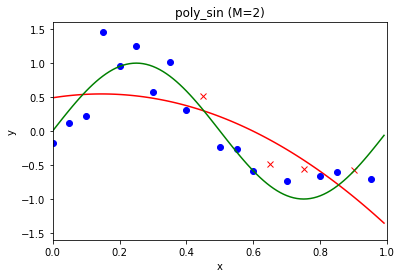

MSE= 0.08562047097362085
[ 2  3  4  5  6  7  8  9 10 11 13 15 16 17 18 19] [ 0  1 12 14]
[0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.65 0.75 0.8  0.85
 0.9  0.95]
[ 0.22407873  1.45304914  0.95681402  1.24953283  0.57666081  1.01498896
  0.30546509  0.51314528 -0.22903337 -0.26906915 -0.48685565 -0.55410646
 -0.66729671 -0.60117484 -0.57758206 -0.69858058]
W
 [ 1.38593968 -2.6489799   0.30515498]


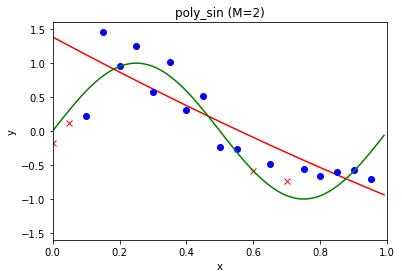

MSE= 1.0308208834571142
[ 0  1  3  4  6  7  8  9 10 12 13 14 15 17 18 19] [ 2  5 11 16]
[0.   0.05 0.15 0.2  0.3  0.35 0.4  0.45 0.5  0.6  0.65 0.7  0.75 0.85
 0.9  0.95]
[-0.1681761   0.11597144  1.45304914  0.95681402  0.57666081  1.01498896
  0.30546509  0.51314528 -0.22903337 -0.58229698 -0.48685565 -0.73534089
 -0.55410646 -0.60117484 -0.57758206 -0.69858058]
W
 [ 0.51970755  0.38425185 -2.13363129]


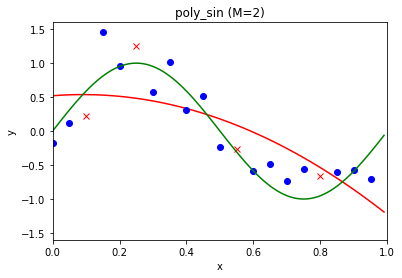

MSE= 0.207168349441206
[ 0  1  2  5  6  7  9 10 11 12 13 14 15 16 18 19] [ 3  4  8 17]
[0.   0.05 0.1  0.25 0.3  0.35 0.45 0.5  0.55 0.6  0.65 0.7  0.75 0.8
 0.9  0.95]
[-0.1681761   0.11597144  0.22407873  1.24953283  0.57666081  1.01498896
  0.51314528 -0.22903337 -0.26906915 -0.58229698 -0.48685565 -0.73534089
 -0.55410646 -0.66729671 -0.57758206 -0.69858058]
W
 [ 0.26960534  0.95771944 -2.51503419]


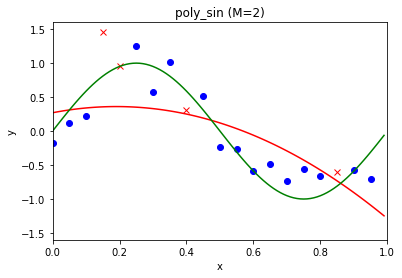

MSE= 0.39452741490223386
CV_MSE[2]=0.388213
[ 0  1  2  3  4  7  8  9 10 12 13 14 15 16 17 19] [ 5  6 11 18]
[0.   0.05 0.1  0.15 0.2  0.35 0.4  0.45 0.5  0.6  0.65 0.7  0.75 0.8
 0.85 0.95]
[-0.1681761   0.11597144  0.22407873  1.45304914  0.95681402  1.01498896
  0.30546509  0.51314528 -0.22903337 -0.58229698 -0.48685565 -0.73534089
 -0.55410646 -0.66729671 -0.60117484 -0.69858058]
W
 [ -0.19912995  10.85639818 -29.94665689  19.20879265]


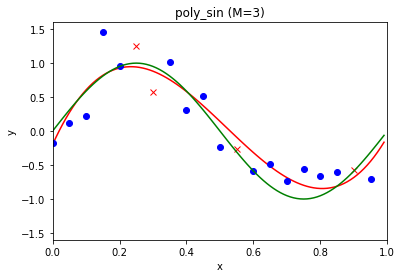

MSE= 0.057253896317636686
[ 0  1  3  4  5  6  7  8  9 11 12 13 14 15 17 18] [ 2 10 16 19]
[0.   0.05 0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.55 0.6  0.65 0.7  0.75
 0.85 0.9 ]
[-0.1681761   0.11597144  1.45304914  0.95681402  1.24953283  0.57666081
  1.01498896  0.30546509  0.51314528 -0.26906915 -0.58229698 -0.48685565
 -0.73534089 -0.55410646 -0.60117484 -0.57758206]
W
 [ -0.16524299  12.18185857 -35.12643083  23.64666476]


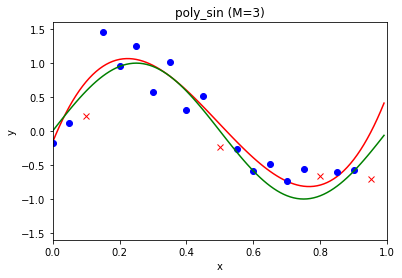

MSE= 0.2089605034645036
[ 1  2  3  4  5  6  7  8  9 10 11 12 16 17 18 19] [ 0 13 14 15]
[0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.8  0.85
 0.9  0.95]
[ 0.11597144  0.22407873  1.45304914  0.95681402  1.24953283  0.57666081
  1.01498896  0.30546509  0.51314528 -0.22903337 -0.26906915 -0.58229698
 -0.66729671 -0.60117484 -0.57758206 -0.69858058]
W
 [ -0.29243497  12.13826192 -33.87091843  22.12318186]


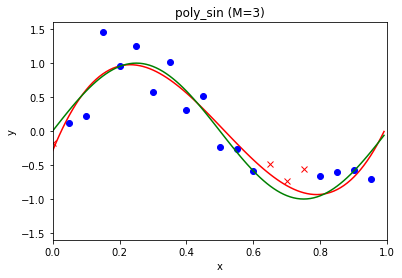

MSE= 0.04200806846558037
[ 0  1  2  3  5  6  7 10 11 13 14 15 16 17 18 19] [ 4  8  9 12]
[0.   0.05 0.1  0.15 0.25 0.3  0.35 0.5  0.55 0.65 0.7  0.75 0.8  0.85
 0.9  0.95]
[-0.1681761   0.11597144  0.22407873  1.45304914  1.24953283  0.57666081
  1.01498896 -0.22903337 -0.26906915 -0.48685565 -0.73534089 -0.55410646
 -0.66729671 -0.60117484 -0.57758206 -0.69858058]
W
 [ -0.20130709  11.01702985 -30.29156488  19.43626942]


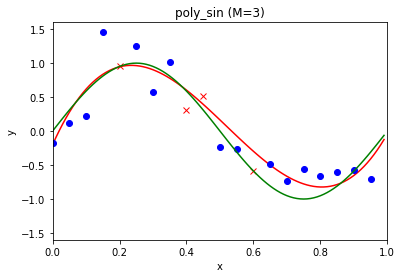

MSE= 0.045942130039273735
[ 0  2  4  5  6  8  9 10 11 12 13 14 15 16 18 19] [ 1  3  7 17]
[0.   0.1  0.2  0.25 0.3  0.4  0.45 0.5  0.55 0.6  0.65 0.7  0.75 0.8
 0.9  0.95]
[-0.1681761   0.22407873  0.95681402  1.24953283  0.57666081  0.30546509
  0.51314528 -0.22903337 -0.26906915 -0.58229698 -0.48685565 -0.73534089
 -0.55410646 -0.66729671 -0.57758206 -0.69858058]
W
 [ -0.19619953   9.55182691 -26.65229626  17.13841769]


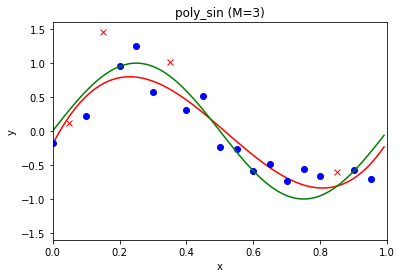

MSE= 0.19666020176566215
CV_MSE[3]=0.110165
[ 0  1  3  4  7  8  9 10 11 12 14 15 16 17 18 19] [ 2  5  6 13]
[0.   0.05 0.15 0.2  0.35 0.4  0.45 0.5  0.55 0.6  0.7  0.75 0.8  0.85
 0.9  0.95]
[-0.1681761   0.11597144  1.45304914  0.95681402  1.01498896  0.30546509
  0.51314528 -0.22903337 -0.26906915 -0.58229698 -0.73534089 -0.55410646
 -0.66729671 -0.60117484 -0.57758206 -0.69858058]
W
 [ -0.34907759  18.89732202 -70.69638388  85.08578571 -33.60571643]


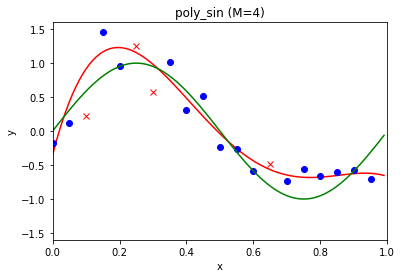

MSE= 0.16452528185445073
[ 1  2  4  5  6  7  8  9 11 12 13 14 15 16 17 18] [ 0  3 10 19]
[0.05 0.1  0.2  0.25 0.3  0.35 0.4  0.45 0.55 0.6  0.65 0.7  0.75 0.8
 0.85 0.9 ]
[ 0.11597144  0.22407873  0.95681402  1.24953283  0.57666081  1.01498896
  0.30546509  0.51314528 -0.26906915 -0.58229698 -0.48685565 -0.73534089
 -0.55410646 -0.66729671 -0.60117484 -0.57758206]
W
 [ -0.83867287  18.6801771  -59.82432763  62.01342864 -20.17919405]


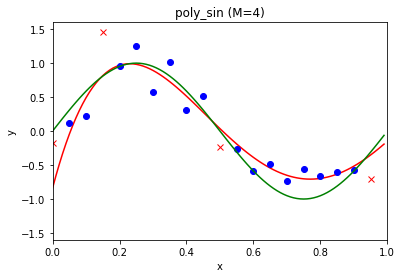

MSE= 0.2614173677806273
[ 0  1  2  3  5  6  8  9 10 11 13 14 15 16 17 19] [ 4  7 12 18]
[0.   0.05 0.1  0.15 0.25 0.3  0.4  0.45 0.5  0.55 0.65 0.7  0.75 0.8
 0.85 0.95]
[-0.1681761   0.11597144  0.22407873  1.45304914  1.24953283  0.57666081
  0.30546509  0.51314528 -0.22903337 -0.26906915 -0.48685565 -0.73534089
 -0.55410646 -0.66729671 -0.60117484 -0.69858058]
W
 [ -0.38206901  16.55050122 -60.49712267  71.53354214 -27.91055393]


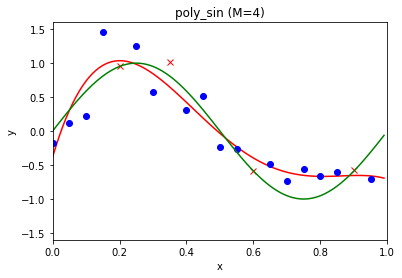

MSE= 0.04530185013717654
[ 0  1  2  3  4  5  6  7  9 10 12 13 14 15 18 19] [ 8 11 16 17]
[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.45 0.5  0.6  0.65 0.7  0.75
 0.9  0.95]
[-0.1681761   0.11597144  0.22407873  1.45304914  0.95681402  1.24953283
  0.57666081  1.01498896  0.51314528 -0.22903337 -0.58229698 -0.48685565
 -0.73534089 -0.55410646 -0.57758206 -0.69858058]
W
 [ -0.38821909  16.04063499 -54.95040476  59.46387881 -20.67722106]


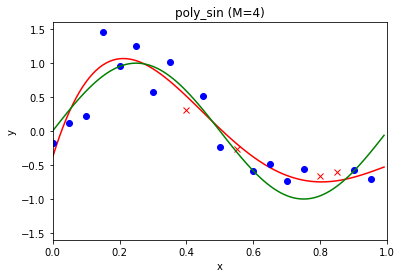

MSE= 0.01819325433086467
[ 0  2  3  4  5  6  7  8 10 11 12 13 16 17 18 19] [ 1  9 14 15]
[0.   0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.5  0.55 0.6  0.65 0.8  0.85
 0.9  0.95]
[-0.1681761   0.22407873  1.45304914  0.95681402  1.24953283  0.57666081
  1.01498896  0.30546509 -0.22903337 -0.26906915 -0.58229698 -0.48685565
 -0.66729671 -0.60117484 -0.57758206 -0.69858058]
W
 [ -0.31920166  16.84177532 -63.27360554  76.04916105 -29.96219315]


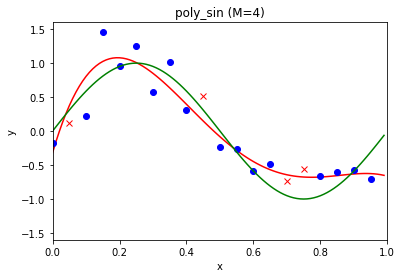

MSE= 0.05583198018460508
CV_MSE[4]=0.109054
[ 0  2  3  4  5  6  7  8  9 10 11 12 13 14 17 18] [ 1 15 16 19]
[0.   0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65 0.7
 0.85 0.9 ]
[-0.1681761   0.22407873  1.45304914  0.95681402  1.24953283  0.57666081
  1.01498896  0.30546509  0.51314528 -0.22903337 -0.26906915 -0.58229698
 -0.48685565 -0.73534089 -0.60117484 -0.57758206]
W
 [ -0.22664402  10.21503564  -7.68238118 -84.08169983 159.39317708
 -78.96508003]


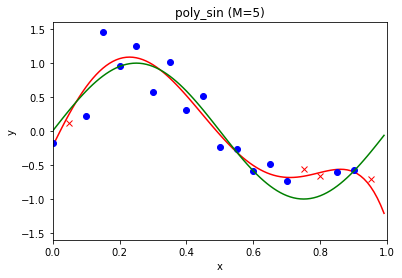

MSE= 0.012448850765629443
[ 0  1  4  5  7  8  9 10 11 12 14 15 16 17 18 19] [ 2  3  6 13]
[0.   0.05 0.2  0.25 0.35 0.4  0.45 0.5  0.55 0.6  0.7  0.75 0.8  0.85
 0.9  0.95]
[-0.1681761   0.11597144  0.95681402  1.24953283  1.01498896  0.30546509
  0.51314528 -0.22903337 -0.26906915 -0.58229698 -0.73534089 -0.55410646
 -0.66729671 -0.60117484 -0.57758206 -0.69858058]
W
 [-2.05047700e-01  6.82678298e+00  2.06550775e+01 -1.62223531e+02
  2.46342025e+02 -1.12730393e+02]


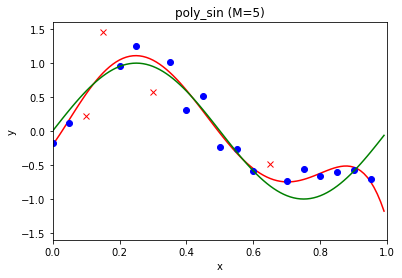

MSE= 0.18161573786377322
[ 0  1  2  3  4  5  6  7 10 12 13 14 15 16 18 19] [ 8  9 11 17]
[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.5  0.6  0.65 0.7  0.75 0.8
 0.9  0.95]
[-0.1681761   0.11597144  0.22407873  1.45304914  0.95681402  1.24953283
  0.57666081  1.01498896 -0.22903337 -0.58229698 -0.48685565 -0.73534089
 -0.55410646 -0.66729671 -0.57758206 -0.69858058]
W
 [ -0.27577999  10.27502587  -5.04690972 -96.29235883 177.14168839
 -87.10190553]


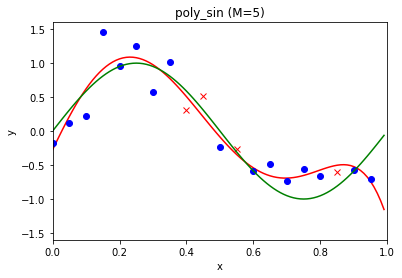

MSE= 0.03734202394719253
[ 1  2  3  5  6  8  9 11 12 13 14 15 16 17 18 19] [ 0  4  7 10]
[0.05 0.1  0.15 0.25 0.3  0.4  0.45 0.55 0.6  0.65 0.7  0.75 0.8  0.85
 0.9  0.95]
[ 0.11597144  0.22407873  1.45304914  1.24953283  0.57666081  0.30546509
  0.51314528 -0.26906915 -0.58229698 -0.48685565 -0.73534089 -0.55410646
 -0.66729671 -0.60117484 -0.57758206 -0.69858058]
W
 [ -1.05475844  25.46625774 -94.60930674 124.29065363 -61.57561578
   6.67498917]


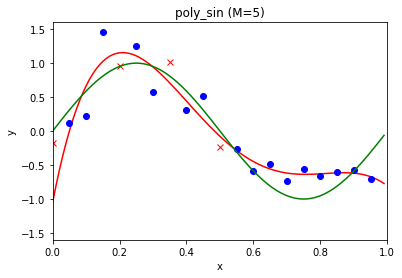

MSE= 0.2352165091494999
[ 0  1  2  3  4  6  7  8  9 10 11 13 15 16 17 19] [ 5 12 14 18]
[0.   0.05 0.1  0.15 0.2  0.3  0.35 0.4  0.45 0.5  0.55 0.65 0.75 0.8
 0.85 0.95]
[-0.1681761   0.11597144  0.22407873  1.45304914  0.95681402  0.57666081
  1.01498896  0.30546509  0.51314528 -0.22903337 -0.26906915 -0.48685565
 -0.55410646 -0.66729671 -0.60117484 -0.69858058]
W
 [ -0.27282324  10.9767129  -17.33898382 -48.45429337 111.06468556
 -57.05017167]


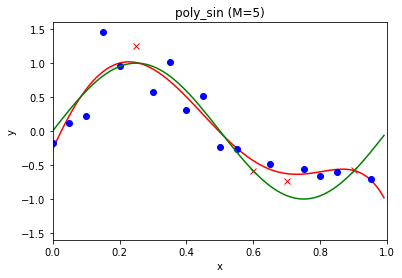

MSE= 0.0227073921813337
CV_MSE[5]=0.097866
[ 0  1  2  3  6  8  9 10 11 12 13 15 16 17 18 19] [ 4  5  7 14]
[0.   0.05 0.1  0.15 0.3  0.4  0.45 0.5  0.55 0.6  0.65 0.75 0.8  0.85
 0.9  0.95]
[-0.1681761   0.11597144  0.22407873  1.45304914  0.57666081  0.30546509
  0.51314528 -0.22903337 -0.26906915 -0.58229698 -0.48685565 -0.55410646
 -0.66729671 -0.60117484 -0.57758206 -0.69858058]
W
 [-2.41147131e-01  7.88255615e+00  2.58493758e+01 -2.61780444e+02
  5.70906719e+02 -5.04093718e+02  1.60868401e+02]


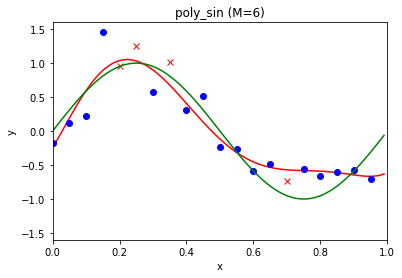

MSE= 0.04906448807847236
[ 0  1  2  3  4  5  6  7  8 10 13 14 15 16 17 19] [ 9 11 12 18]
[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.5  0.65 0.7  0.75 0.8
 0.85 0.95]
[-0.1681761   0.11597144  0.22407873  1.45304914  0.95681402  1.24953283
  0.57666081  1.01498896  0.30546509 -0.22903337 -0.48685565 -0.73534089
 -0.55410646 -0.66729671 -0.60117484 -0.69858058]
W
 [-2.02844643e-01  3.15314613e+00  8.83437208e+01 -5.39044750e+02
  1.11226991e+03 -9.88262365e+02  3.23362517e+02]


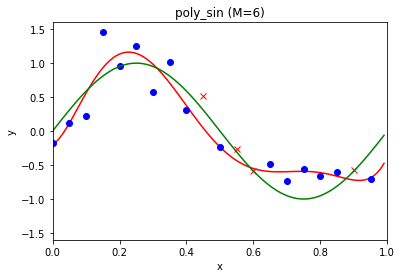

MSE= 0.06728004355163866
[ 1  2  4  5  6  7  8  9 10 11 12 14 15 16 17 18] [ 0  3 13 19]
[0.05 0.1  0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.7  0.75 0.8
 0.85 0.9 ]
[ 0.11597144  0.22407873  0.95681402  1.24953283  0.57666081  1.01498896
  0.30546509  0.51314528 -0.22903337 -0.26906915 -0.58229698 -0.73534089
 -0.55410646 -0.66729671 -0.60117484 -0.57758206]
W
 [ 2.25269392e-01 -9.05054813e+00  1.53674901e+02 -6.52715188e+02
  1.14519352e+03 -9.10635901e+02  2.72945173e+02]


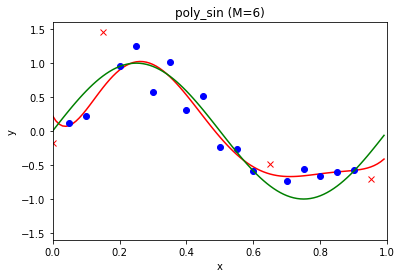

MSE= 0.2180706302942194
[ 0  3  4  5  6  7  8  9 10 11 12 13 14 15 18 19] [ 1  2 16 17]
[0.   0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65 0.7  0.75
 0.9  0.95]
[-0.1681761   1.45304914  0.95681402  1.24953283  0.57666081  1.01498896
  0.30546509  0.51314528 -0.22903337 -0.26906915 -0.58229698 -0.48685565
 -0.73534089 -0.55410646 -0.57758206 -0.69858058]
W
 [-1.57211570e-01  2.52698290e+01 -1.60135479e+02  4.76013469e+02
 -8.04373445e+02  7.09600559e+02 -2.47718692e+02]


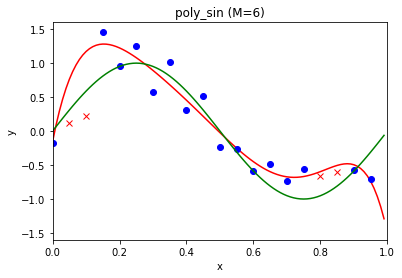

MSE= 0.33153128819375444
[ 0  1  2  3  4  5  7  9 11 12 13 14 16 17 18 19] [ 6  8 10 15]
[0.   0.05 0.1  0.15 0.2  0.25 0.35 0.45 0.55 0.6  0.65 0.7  0.8  0.85
 0.9  0.95]
[-0.1681761   0.11597144  0.22407873  1.45304914  0.95681402  1.24953283
  1.01498896  0.51314528 -0.26906915 -0.58229698 -0.48685565 -0.73534089
 -0.66729671 -0.60117484 -0.57758206 -0.69858058]
W
 [-1.92001582e-01  3.19789995e+00  7.24442413e+01 -3.86099713e+02
  6.80270423e+02 -5.06658804e+02  1.36141025e+02]


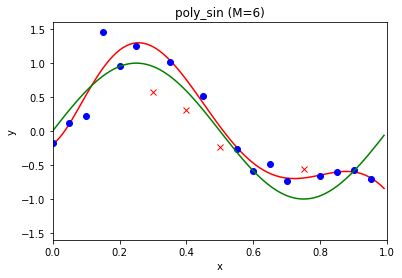

MSE= 0.18666954265367836
CV_MSE[6]=0.170523
[ 0  1  3  4  5  6  7  8 10 11 12 13 16 17 18 19] [ 2  9 14 15]
[0.   0.05 0.15 0.2  0.25 0.3  0.35 0.4  0.5  0.55 0.6  0.65 0.8  0.85
 0.9  0.95]
[-0.1681761   0.11597144  1.45304914  0.95681402  1.24953283  0.57666081
  1.01498896  0.30546509 -0.22903337 -0.26906915 -0.58229698 -0.48685565
 -0.66729671 -0.60117484 -0.57758206 -0.69858058]
W
 [-2.12953435e-01  6.04246501e+00  1.00776124e+02 -8.41774769e+02
  2.44700177e+03 -3.49753708e+03  2.49447167e+03 -7.10118105e+02]


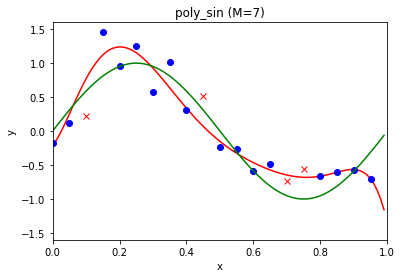

MSE= 0.1294943609344462
[ 0  2  3  4  5  6  7  9 10 11 13 14 15 16 18 19] [ 1  8 12 17]
[0.   0.1  0.15 0.2  0.25 0.3  0.35 0.45 0.5  0.55 0.65 0.7  0.75 0.8
 0.9  0.95]
[-0.1681761   0.22407873  1.45304914  0.95681402  1.24953283  0.57666081
  1.01498896  0.51314528 -0.22903337 -0.26906915 -0.48685565 -0.73534089
 -0.55410646 -0.66729671 -0.57758206 -0.69858058]
W
 [-1.93165689e-01 -1.55321474e+00  1.69273830e+02 -1.07640401e+03
  2.86836823e+03 -3.93768079e+03  2.75488181e+03 -7.78171943e+02]


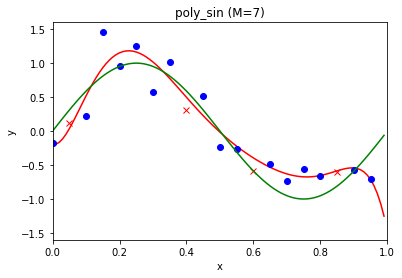

MSE= 0.01961915792584294
[ 1  2  3  4  5  7  8  9 12 13 14 15 16 17 18 19] [ 0  6 10 11]
[0.05 0.1  0.15 0.2  0.25 0.35 0.4  0.45 0.6  0.65 0.7  0.75 0.8  0.85
 0.9  0.95]
[ 0.11597144  0.22407873  1.45304914  0.95681402  1.24953283  1.01498896
  0.30546509  0.51314528 -0.58229698 -0.48685565 -0.73534089 -0.55410646
 -0.66729671 -0.60117484 -0.57758206 -0.69858058]
W
 [-1.83727595e-01 -1.06768883e+00  1.55188471e+02 -9.32480090e+02
  2.31067994e+03 -2.94680542e+03  1.93099181e+03 -5.17538749e+02]


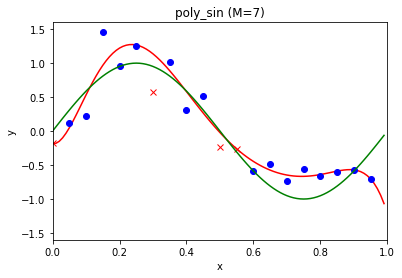

MSE= 0.08905365014600891
[ 0  1  2  3  5  6  8  9 10 11 12 13 14 15 17 19] [ 4  7 16 18]
[0.   0.05 0.1  0.15 0.25 0.3  0.4  0.45 0.5  0.55 0.6  0.65 0.7  0.75
 0.85 0.95]
[-0.1681761   0.11597144  0.22407873  1.45304914  1.24953283  0.57666081
  0.30546509  0.51314528 -0.22903337 -0.26906915 -0.58229698 -0.48685565
 -0.73534089 -0.55410646 -0.60117484 -0.69858058]
W
 [-1.71997290e-01 -5.23471163e+00  2.58974281e+02 -1.72159472e+03
  4.90316075e+03 -7.13336922e+03  5.21472629e+03 -1.51864966e+03]


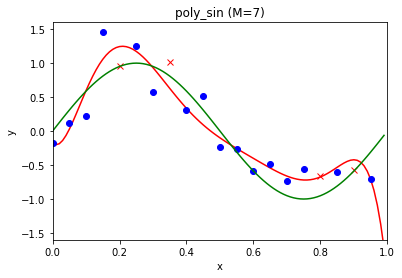

MSE= 0.06410024460804521
[ 0  1  2  4  6  7  8  9 10 11 12 14 15 16 17 18] [ 3  5 13 19]
[0.   0.05 0.1  0.2  0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.7  0.75 0.8
 0.85 0.9 ]
[-0.1681761   0.11597144  0.22407873  0.95681402  0.57666081  1.01498896
  0.30546509  0.51314528 -0.22903337 -0.26906915 -0.58229698 -0.73534089
 -0.55410646 -0.66729671 -0.60117484 -0.57758206]
W
 [-1.62150791e-01  4.10517187e+00  8.81078349e+00  2.96310736e+01
 -4.79364047e+02  1.14884747e+03 -1.05425922e+03  3.41937125e+02]


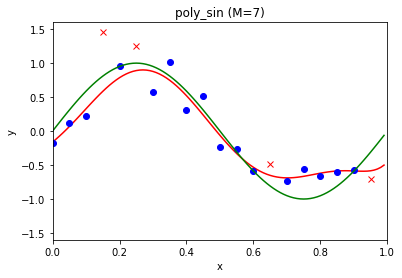

MSE= 0.2306589668799375
CV_MSE[7]=0.106585
[ 0  2  3  4  5  6  7 10 11 13 14 15 16 17 18 19] [ 1  8  9 12]
[0.   0.1  0.15 0.2  0.25 0.3  0.35 0.5  0.55 0.65 0.7  0.75 0.8  0.85
 0.9  0.95]
[-0.1681761   0.22407873  1.45304914  0.95681402  1.24953283  0.57666081
  1.01498896 -0.22903337 -0.26906915 -0.48685565 -0.73534089 -0.55410646
 -0.66729671 -0.60117484 -0.57758206 -0.69858058]
W
 [-1.79729676e-01 -2.39381837e+01  6.01761679e+02 -4.23213134e+03
  1.44624646e+04 -2.76634825e+04  3.02251370e+04 -1.76156321e+04
  4.24584512e+03]


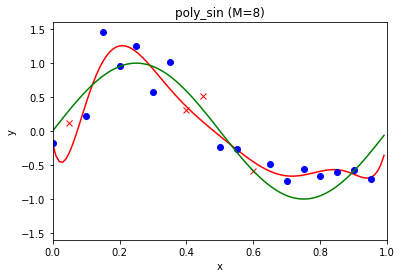

MSE= 0.08854517058415926
[ 1  2  4  5  6  7  8  9 10 11 12 13 15 16 18 19] [ 0  3 14 17]
[0.05 0.1  0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65 0.75 0.8
 0.9  0.95]
[ 0.11597144  0.22407873  0.95681402  1.24953283  0.57666081  1.01498896
  0.30546509  0.51314528 -0.22903337 -0.26906915 -0.58229698 -0.48685565
 -0.55410646 -0.66729671 -0.57758206 -0.69858058]
W
 [ 1.13051466e+00 -4.19598062e+01  5.63199588e+02 -3.07301770e+03
  8.92379737e+03 -1.52884613e+04  1.55438055e+04 -8.65969968e+03
  2.03065986e+03]


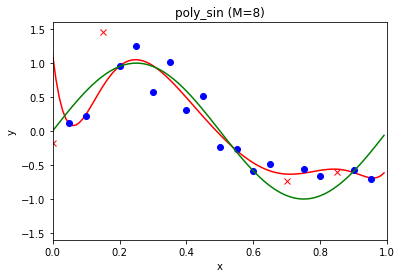

MSE= 0.5832381655057326
[ 0  1  3  5  6  7  8  9 10 12 13 14 15 17 18 19] [ 2  4 11 16]
[0.   0.05 0.15 0.25 0.3  0.35 0.4  0.45 0.5  0.6  0.65 0.7  0.75 0.85
 0.9  0.95]
[-0.1681761   0.11597144  1.45304914  1.24953283  0.57666081  1.01498896
  0.30546509  0.51314528 -0.22903337 -0.58229698 -0.48685565 -0.73534089
 -0.55410646 -0.60117484 -0.57758206 -0.69858058]
W
 [-1.82967210e-01 -8.49327360e+00  4.73862305e+02 -4.05152706e+03
  1.57399580e+04 -3.32966729e+04  3.94966398e+04 -2.46416633e+04
  6.28886827e+03]


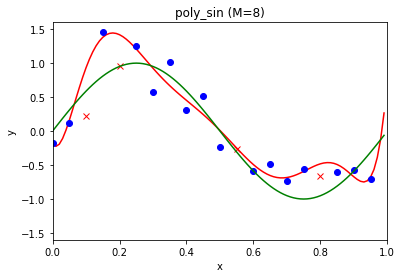

MSE= 0.18750982951474932
[ 0  1  2  3  4  5  6  7  8  9 11 12 13 14 16 17] [10 15 18 19]
[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.55 0.6  0.65 0.7
 0.8  0.85]
[-0.1681761   0.11597144  0.22407873  1.45304914  0.95681402  1.24953283
  0.57666081  1.01498896  0.30546509  0.51314528 -0.26906915 -0.58229698
 -0.48685565 -0.73534089 -0.66729671 -0.60117484]
W
 [-1.37947580e-01 -1.62666129e+01  5.38290328e+02 -4.41232407e+03
  1.74673331e+04 -3.85058950e+04  4.81077343e+04 -3.18168456e+04
  8.65102579e+03]


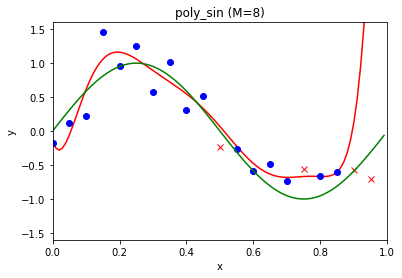

MSE= 4.161278946565278
[ 0  1  2  3  4  8  9 10 11 12 14 15 16 17 18 19] [ 5  6  7 13]
[0.   0.05 0.1  0.15 0.2  0.4  0.45 0.5  0.55 0.6  0.7  0.75 0.8  0.85
 0.9  0.95]
[-0.1681761   0.11597144  0.22407873  1.45304914  0.95681402  0.30546509
  0.51314528 -0.22903337 -0.26906915 -0.58229698 -0.73534089 -0.55410646
 -0.66729671 -0.60117484 -0.57758206 -0.69858058]
W
 [-1.48250511e-01 -1.10722359e+01  4.02302587e+02 -3.11975120e+03
  1.14645376e+04 -2.34238256e+04  2.71542539e+04 -1.66638317e+04
  4.19760750e+03]


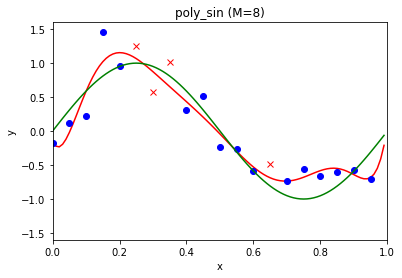

MSE= 0.07319695626743632
CV_MSE[8]=1.018754
[ 0  1  2  4  5  6  9 10 11 12 13 14 15 16 18 19] [ 3  7  8 17]
[0.   0.05 0.1  0.2  0.25 0.3  0.45 0.5  0.55 0.6  0.65 0.7  0.75 0.8
 0.9  0.95]
[-0.1681761   0.11597144  0.22407873  0.95681402  1.24953283  0.57666081
  0.51314528 -0.22903337 -0.26906915 -0.58229698 -0.48685565 -0.73534089
 -0.55410646 -0.66729671 -0.57758206 -0.69858058]
W
 [-1.49802212e-01  1.51396395e+00  3.88614718e+01  1.36051553e+02
 -2.62192344e+03  1.07093203e+04 -2.15833387e+04  2.39830463e+04
 -1.40627614e+04  3.39898738e+03]


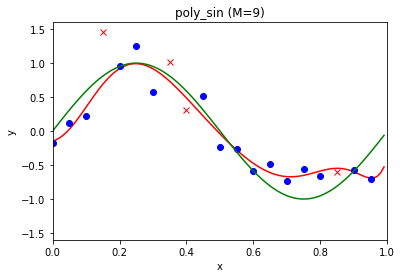

MSE= 0.1751390305776481
[ 0  2  3  5  6  7  8  9 10 12 13 14 15 16 17 19] [ 1  4 11 18]
[0.   0.1  0.15 0.25 0.3  0.35 0.4  0.45 0.5  0.6  0.65 0.7  0.75 0.8
 0.85 0.95]
[-0.1681761   0.22407873  1.45304914  1.24953283  0.57666081  1.01498896
  0.30546509  0.51314528 -0.22903337 -0.58229698 -0.48685565 -0.73534089
 -0.55410646 -0.66729671 -0.60117484 -0.69858058]
W
 [-1.68424307e-01 -1.42940040e+02  3.37318205e+03 -2.93720764e+04
  1.33667467e+05 -3.56178544e+05  5.75464034e+05 -5.54708374e+05
  2.93419859e+05 -6.55313550e+04]


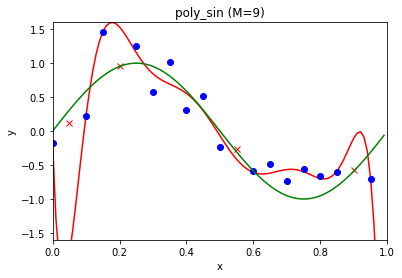

MSE= 1.0834124452904594
[ 0  1  2  3  4  6  7  8  9 11 13 14 16 17 18 19] [ 5 10 12 15]
[0.   0.05 0.1  0.15 0.2  0.3  0.35 0.4  0.45 0.55 0.65 0.7  0.8  0.85
 0.9  0.95]
[-0.1681761   0.11597144  0.22407873  1.45304914  0.95681402  0.57666081
  1.01498896  0.30546509  0.51314528 -0.26906915 -0.48685565 -0.73534089
 -0.66729671 -0.60117484 -0.57758206 -0.69858058]
W
 [-1.40973813e-01 -1.85199985e+01  6.32123154e+02 -5.64265386e+03
  2.49132876e+04 -6.32716601e+04  9.65276728e+04 -8.73984135e+04
  4.33295709e+04 -9.07270640e+03]


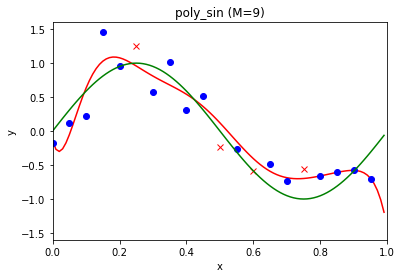

MSE= 0.06461109569199708
[ 1  2  3  4  5  7  8  9 10 11 12 14 15 16 17 18] [ 0  6 13 19]
[0.05 0.1  0.15 0.2  0.25 0.35 0.4  0.45 0.5  0.55 0.6  0.7  0.75 0.8
 0.85 0.9 ]
[ 0.11597144  0.22407873  1.45304914  0.95681402  1.24953283  1.01498896
  0.30546509  0.51314528 -0.22903337 -0.26906915 -0.58229698 -0.73534089
 -0.55410646 -0.66729671 -0.60117484 -0.57758206]
W
 [ 5.56264797e+00 -2.42016356e+02  3.81894887e+03 -2.86640683e+04
  1.21384804e+05 -3.11434380e+05  4.93266983e+05 -4.71027563e+05
  2.48488232e+05 -5.56102937e+04]


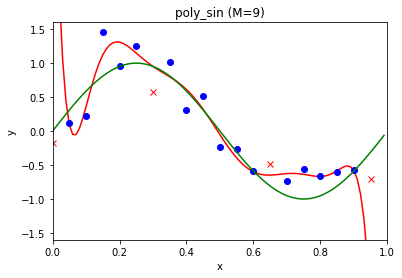

MSE= 9.20685981999161
[ 0  1  3  4  5  6  7  8 10 11 12 13 15 17 18 19] [ 2  9 14 16]
[0.   0.05 0.15 0.2  0.25 0.3  0.35 0.4  0.5  0.55 0.6  0.65 0.75 0.85
 0.9  0.95]
[-0.1681761   0.11597144  1.45304914  0.95681402  1.24953283  0.57666081
  1.01498896  0.30546509 -0.22903337 -0.26906915 -0.58229698 -0.48685565
 -0.55410646 -0.60117484 -0.57758206 -0.69858058]
W
 [-1.75595454e-01 -1.89668265e+01  8.50761341e+02 -8.77959365e+03
  4.39173793e+04 -1.25096146e+05  2.12422945e+05 -2.12529056e+05
  1.15555468e+05 -2.63263463e+04]


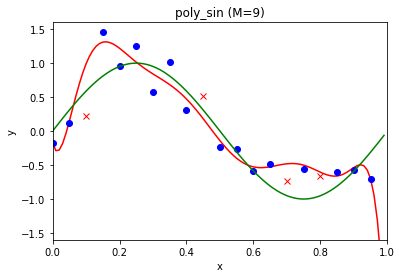

MSE= 0.19090460424529593
CV_MSE[9]=2.144185


In [4]:
from sklearn.model_selection import KFold

search_range = [0,1,2,3,4,5,6,7,8,9]
n_fold = 5

CV_MSE = np.zeros(len(search_range))

for M in search_range:

  kf = KFold(n_splits=n_fold, shuffle=True)
  for train_indx, test_indx in kf.split(x_train):
    print("%s %s" % (train_indx, test_indx))
    x_train_cv = x_train[train_indx]
    y_train_cv = y_train[train_indx]
    x_test_cv = x_train[test_indx]
    y_test_cv = y_train[test_indx]

    print(x_train_cv)
    print(y_train_cv)

    W = E(x_train_cv, y_train_cv, M)
    print('W\n', W)

    y_estimate_cv = [y(x, W, M) for x in x_test_cv]

    y_estimate = [y(x, W, M) for x in x_real]

    plt.plot(x_real, y_estimate, 'r-')
    plt.plot(x_train_cv, y_train_cv, 'bo')
    plt.plot(x_test_cv, y_test_cv, 'rx') 
    plt.plot(x_real, y_real, 'g-')
    plt.xlim(0.0, 1.0)
    plt.ylim(-1.6, 1.6)
    plt.title("poly_sin (M=%s)" % M)
    plt.xlabel('x')
    plt.ylabel('y')
#    plt.savefig('poly_sin_%d.eps' % M)
    plt.show()
    plt.close()


    mse = (np.square(y_test_cv - y_estimate_cv)).mean()
    print('MSE=', mse)

    CV_MSE[M] += mse

  CV_MSE[M]=CV_MSE[M]/n_fold

  print('CV_MSE[%d]=%f'% (M, CV_MSE[M]))



CV_MSE
 [0.69622862 0.38890768 0.4089195  0.08636293 0.0741539  0.1032157
 0.10474293 0.46400864 0.97914664 5.75115769]
The best order of the model is 5


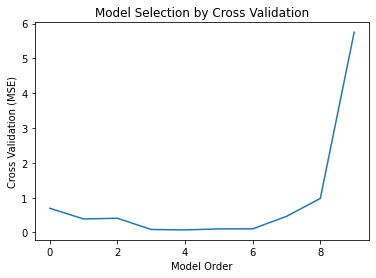

In [9]:
print('CV_MSE\n', CV_MSE)
print('The best order of the model is %d' % (np.argmin(CV_MSE)+1))

plt.plot(CV_MSE)
plt.title("Model Selection by Cross Validation")
plt.xlabel('Model Order')
plt.ylabel('Cross Validation (MSE)')
plt.savefig('poly_sin_cvMSE.eps')
plt.show()
plt.close()
